# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [24]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [25]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

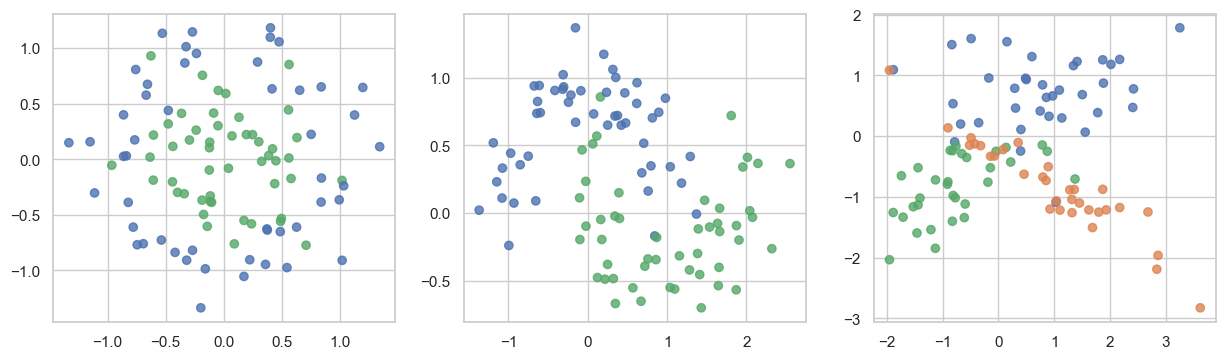

In [26]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [27]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

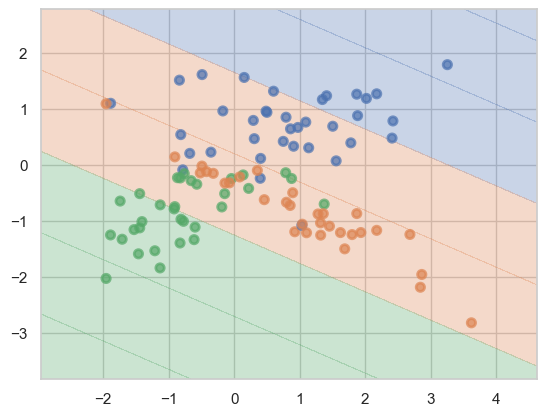

In [28]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

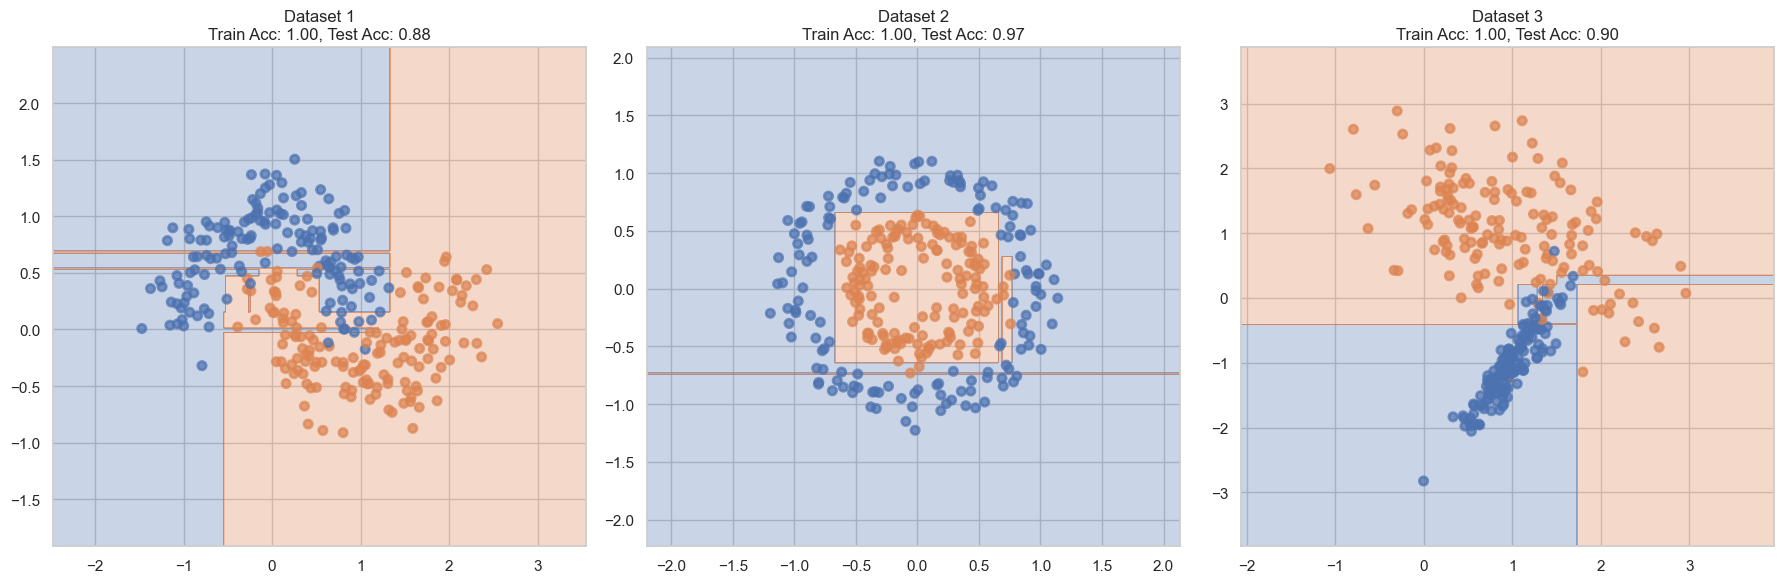

,Train Accuracy,Test Accuracy
Dataset 1,1.0,0.883333
Dataset 2,1.0,0.966667
Dataset 3,1.0,0.900000


In [29]:
datasets = [
    make_moons(n_samples=300, noise=0.2, random_state=42),
    make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42),
    make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
]


results = []
plt.figure(figsize=(18, 6))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    results.append((train_acc, test_acc))
    
    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X, y)
    plt.title(f"Dataset {i+1}\nTrain Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results, columns=["Train Accuracy", "Test Accuracy"], index=["Dataset 1", "Dataset 2", "Dataset 3"])
results_df


Ответ: Деревья явно переобучились — это видно, потому что на тренировочных данных точность всегда 1 или очень близка к этому. На графиках тоже заметно, что модель пытается подогнать разделяющие линии под каждую точку, что на тесте даёт хуже результат.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

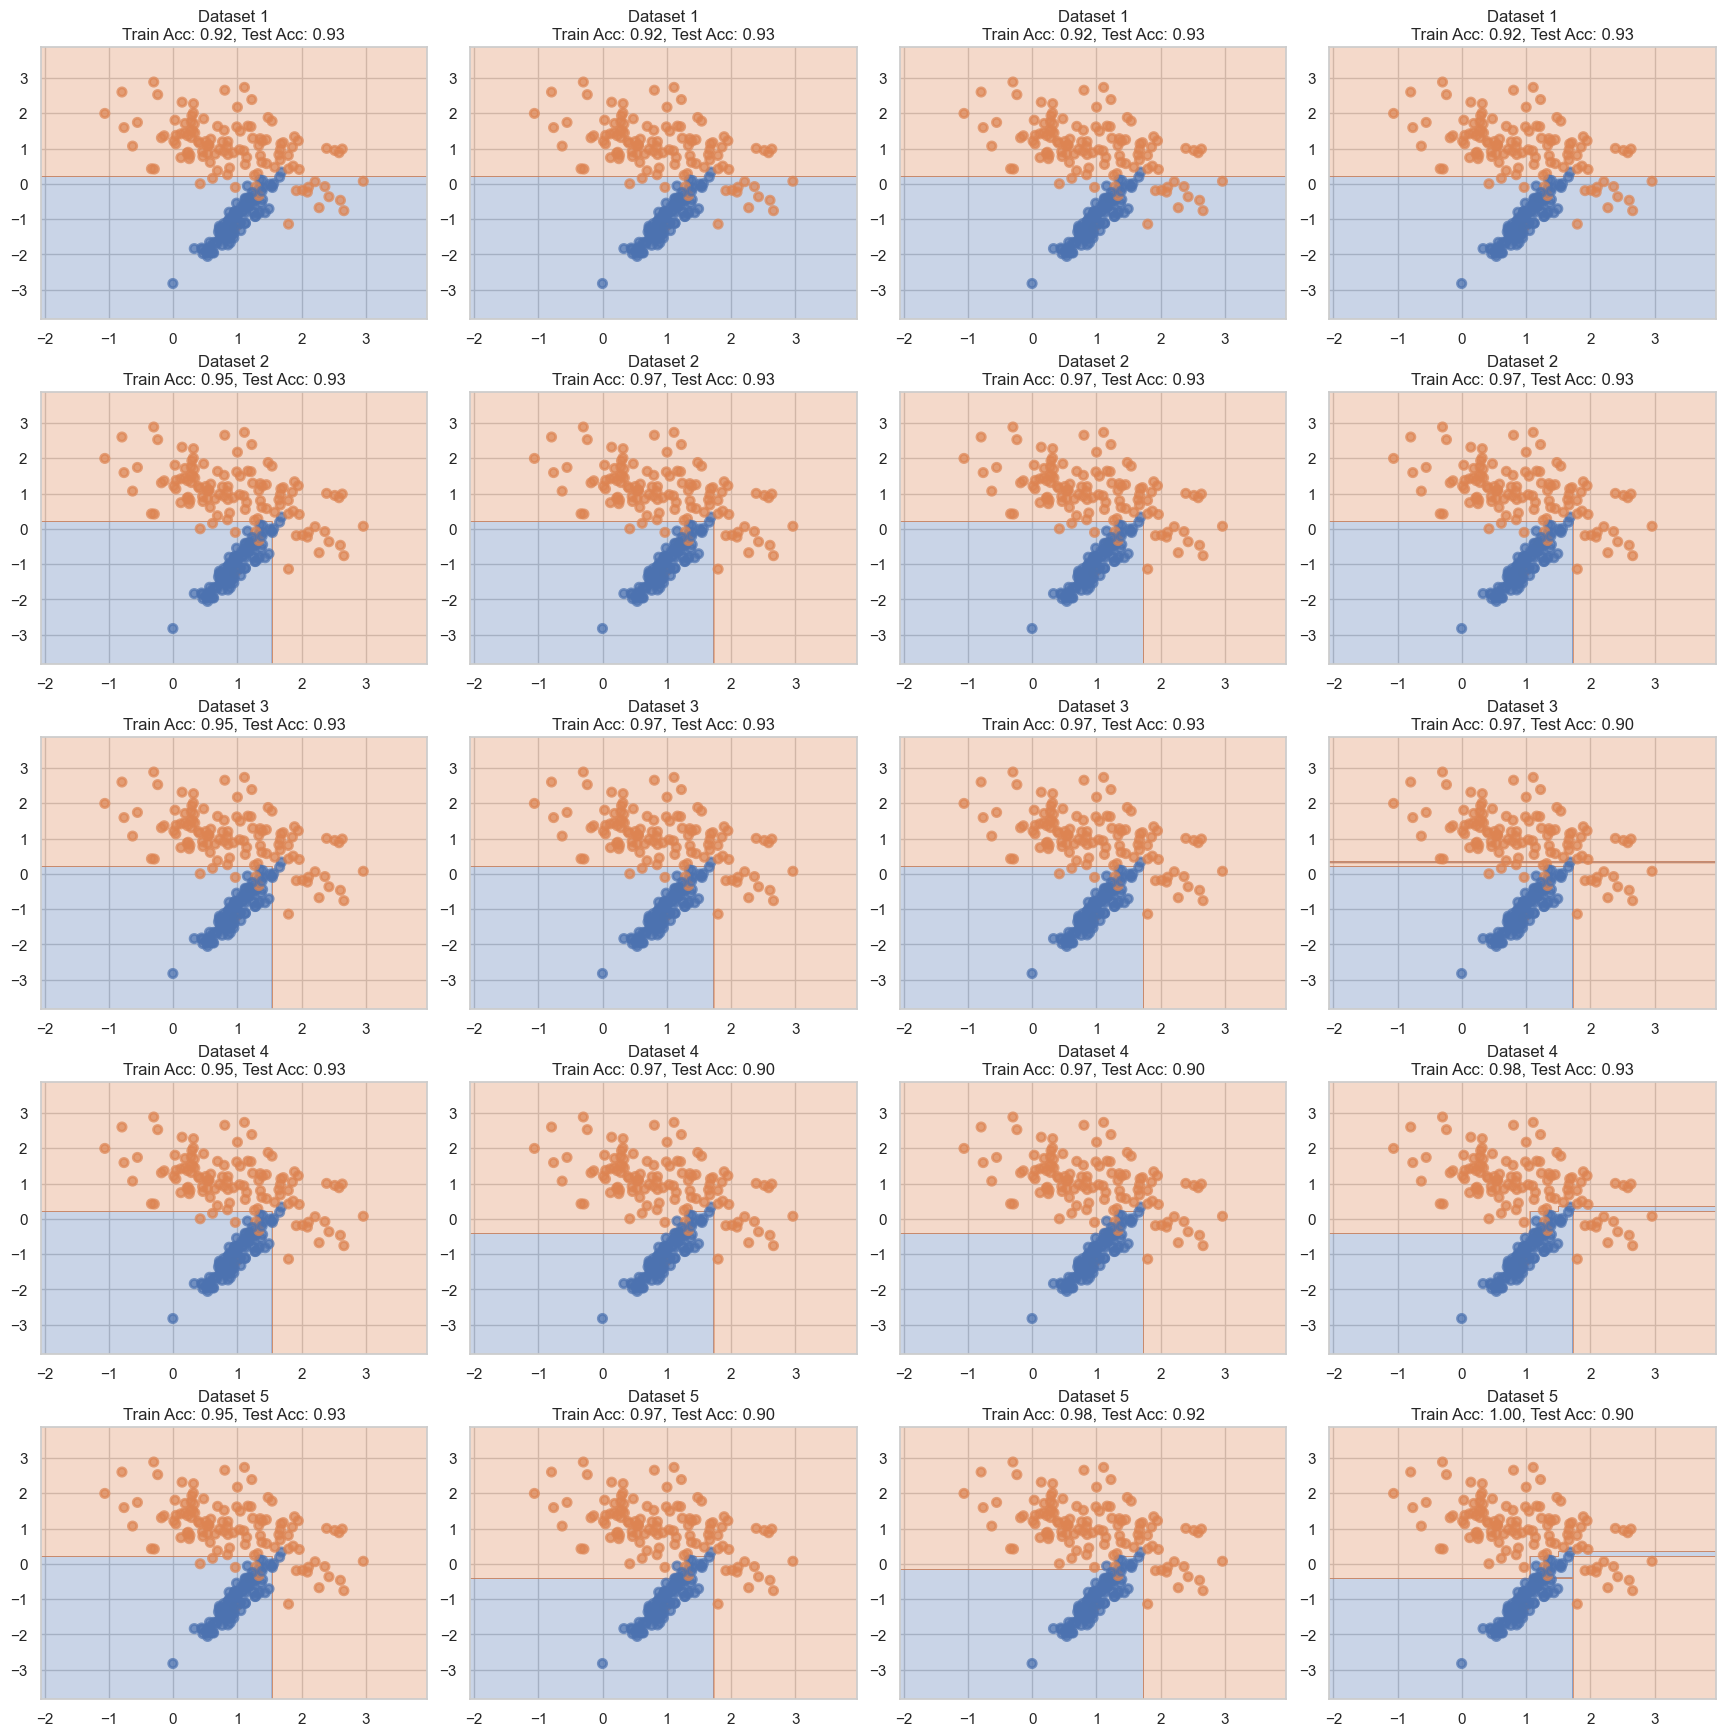

In [30]:
results = []
plt.figure(figsize=(18, 18))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y= datasets[0]
for i, max_depth in enumerate([1,2,3, 4, None]):
    for j, min_samples_leaf in enumerate([15,10, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42).fit(X_train, y_train)

        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)
        results.append((train_acc, test_acc))
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(clf, X_train, y_train)
        plt.title(f"Dataset {i+1}\nTrain Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")



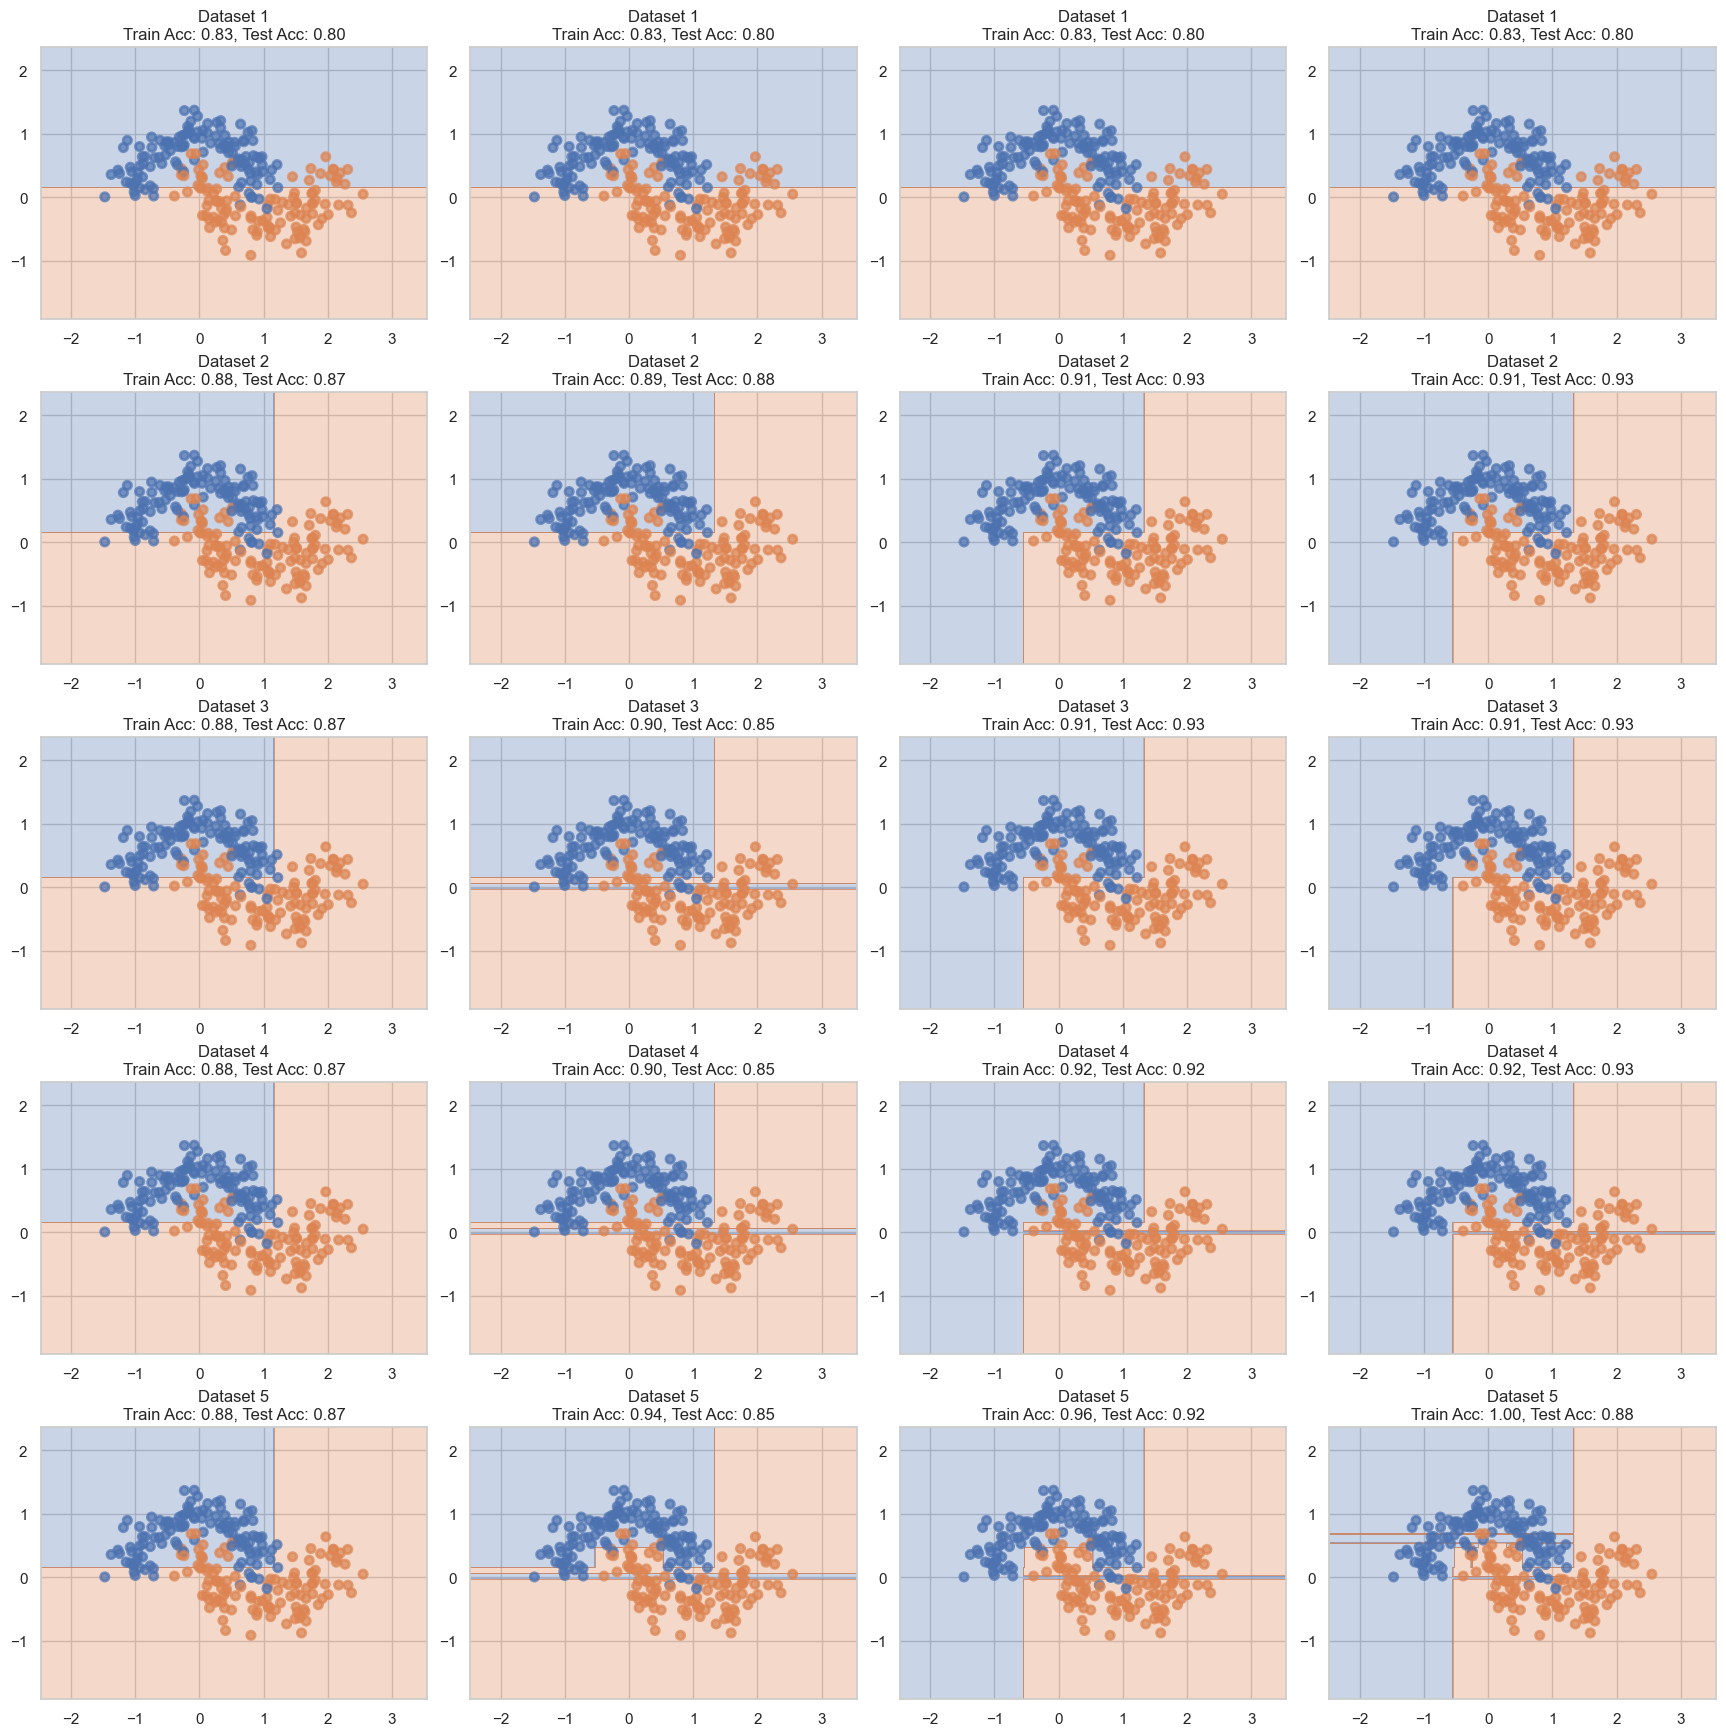

In [31]:
results = []
plt.figure(figsize=(18, 18))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y= datasets[1]
for i, max_depth in enumerate([1,2,3, 4, None]):
    for j, min_samples_leaf in enumerate([15,10, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42).fit(X_train, y_train)

        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)
        results.append((train_acc, test_acc))
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(clf, X_train, y_train)
        plt.title(f"Dataset {i+1}\nTrain Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")



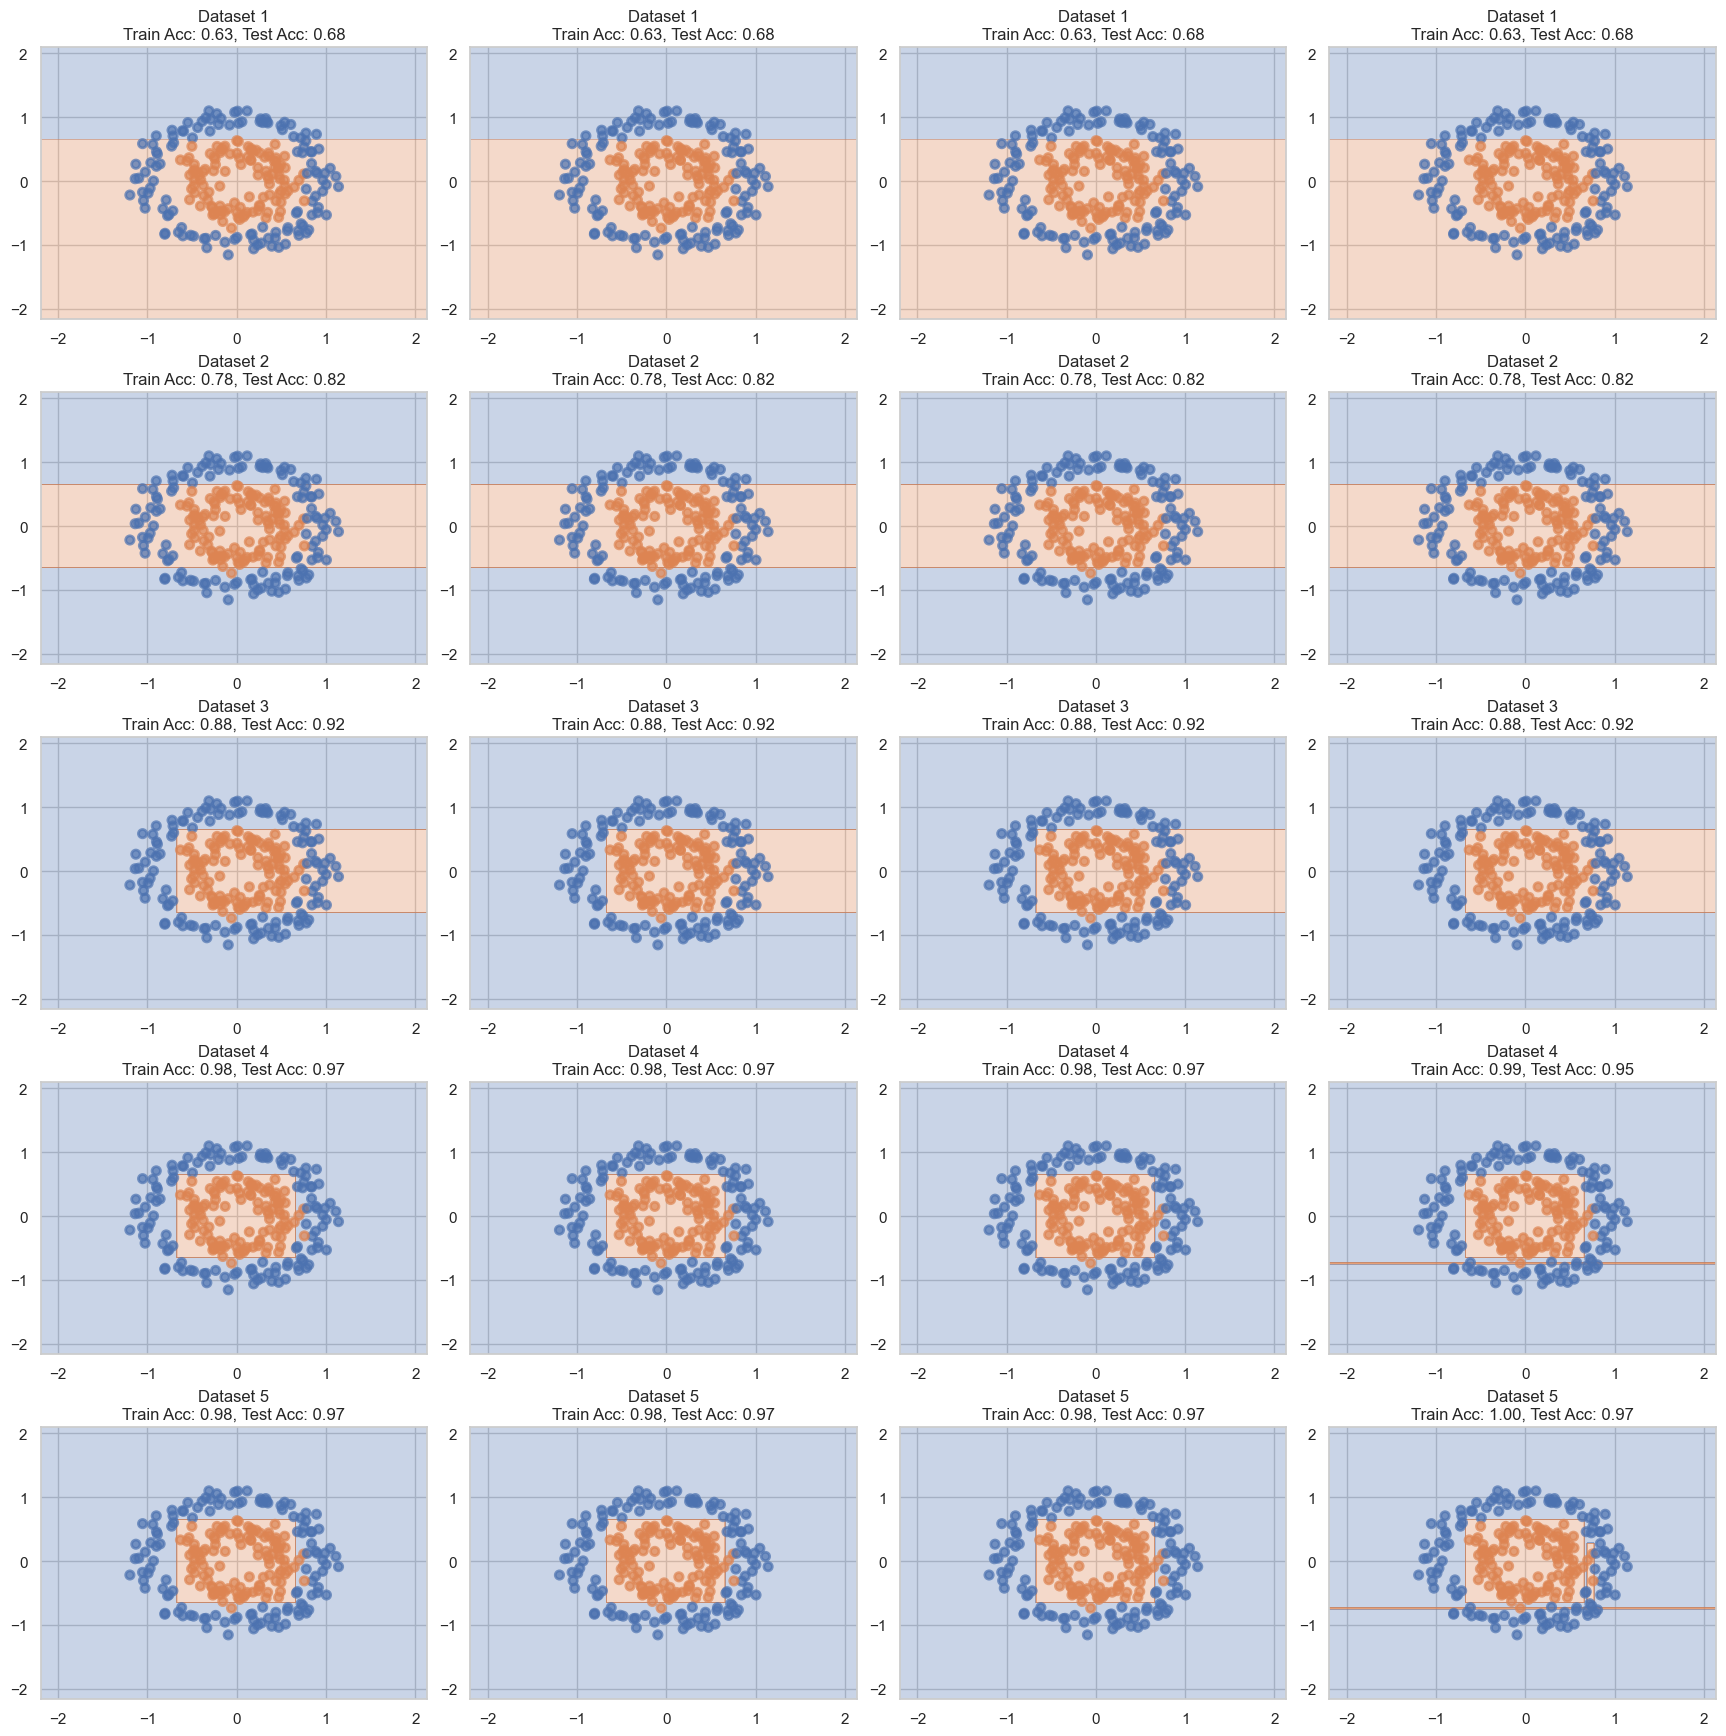

In [32]:
results = []
plt.figure(figsize=(18, 18))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y= datasets[2]
for i, max_depth in enumerate([1,2,3, 4, None]):
    for j, min_samples_leaf in enumerate([15,10, 5, 1]):
        clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=42).fit(X_train, y_train)

        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)
        results.append((train_acc, test_acc))
        
        plt.subplot2grid((5, 4), (i, j))
        plot_surface(clf, X_train, y_train)
        plt.title(f"Dataset {i+1}\nTrain Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")



__Ответ:__ max_depth: Чем больше максимальная глубина дерева, тем сильнее модель начинает подстраиваться под данные, то есть переобучаться. При маленькой глубине разделяющая поверхность более простая и обобщённая, а при большой — появляются лишние детали, которые пытаются угадать каждую точку, что не всегда хорошо.

min_samples_leaf: Если минимальное количество объектов в листе уменьшается, деревья тоже начинают переобучаться. Модель начинает слишком точно подстраиваться под отдельные точки, добавляя к разделяющей поверхности ненужные куски.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

[БАМ](https://contest.yandex.ru/contest/72492/run-report/129695933/)

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [33]:
df = pd.read_csv('students.csv')
df.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371860,0.356124,0.468023,0.432713,0.458527,0.585271
std,0.210093,0.211801,0.245926,0.248108,0.255217,0.493633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.210000,0.292500,0.250000,0.250000,0.000000
50%,0.330000,0.305000,0.490000,0.330000,0.500000,1.000000
75%,0.500000,0.497500,0.690000,0.647500,0.660000,1.000000
max,0.990000,0.900000,0.950000,0.990000,0.930000,1.000000


In [34]:
from hw5code import find_best_split
df.head(10)


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
5,0.09,0.15,0.40,0.10,0.66,1
6,0.10,0.10,0.43,0.29,0.56,1
7,0.15,0.02,0.34,0.40,0.01,0
8,0.20,0.14,0.35,0.72,0.25,0
9,0.00,0.00,0.50,0.20,0.85,1


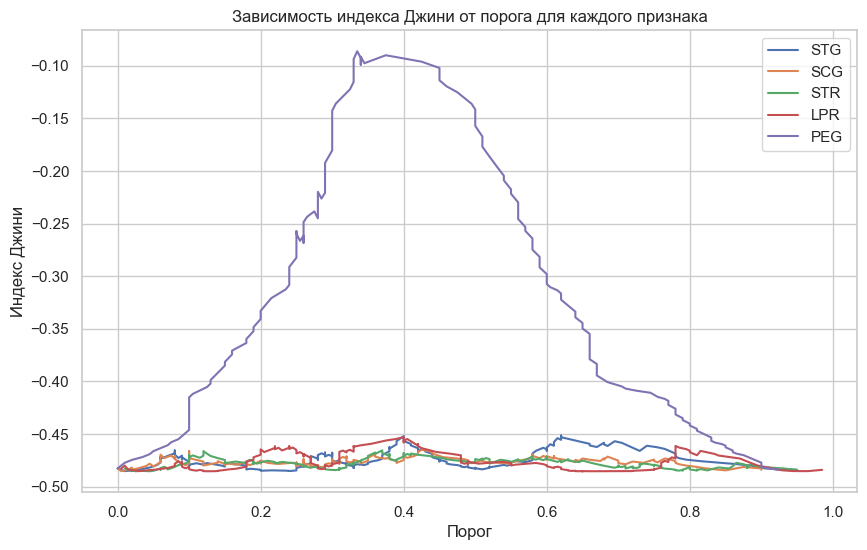

In [35]:
# Построение графиков
plt.figure(figsize=(10, 6))
for column in df.columns[:-1]:
    thresholds, gini_scores, _, _ = find_best_split(df[column].values, df['UNS'].values)
    plt.plot(thresholds, gini_scores, label=column)

plt.xlabel('Порог')
plt.ylabel('Индекс Джини')
plt.title('Зависимость индекса Джини от порога для каждого признака')
plt.legend()
plt.grid(True)
plt.show()

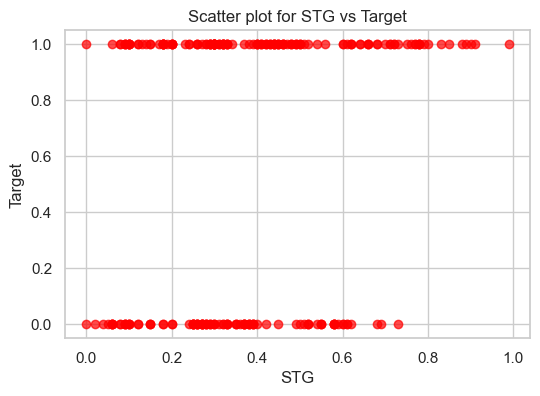

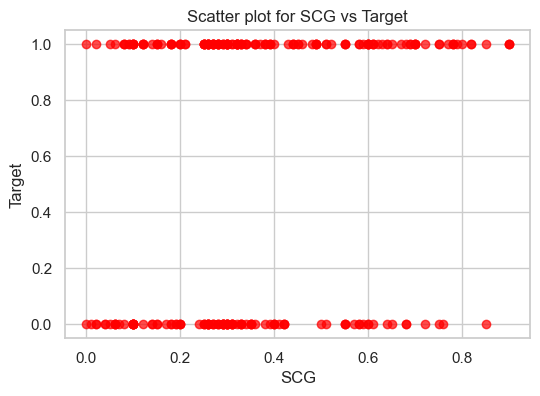

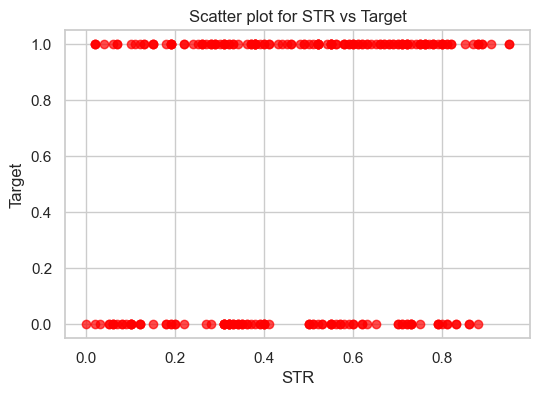

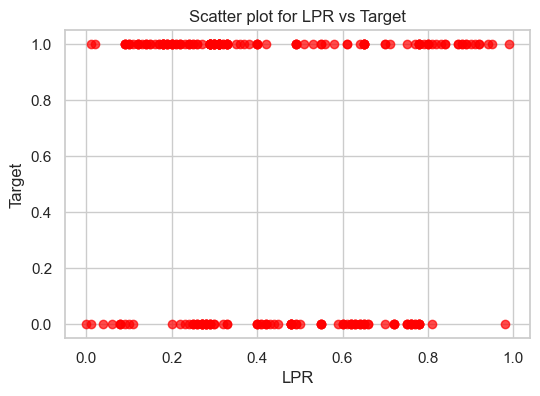

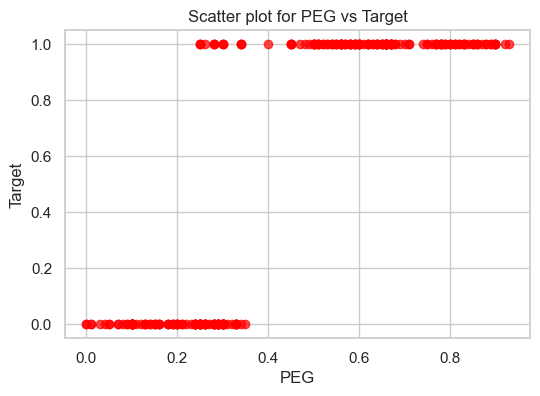

In [36]:
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[column], df['UNS'], alpha=0.7, color='red')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.title(f'Scatter plot for {column} vs Target')
    plt.grid(True)
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Лучше всего делить выборку по признаку PEG, так как именно для него критерий Джини достигает максимального значения. Это подтверждается визуально: на scatter-графике видно, что данные по этому признаку хорошо разделяются на две группы.

Для "хороших" признаков, по которым выборка делится почти идеально, кривая Джини выглядит как чёткая горка с выраженной вершиной — это значит, что есть оптимальный порог для разбиения. Scatter-график таких признаков также показывает явное разделение данных на кластеры. В отличие от этого, для плохих признаков, где деление невозможно, кривая Джини будет почти плоской или хаотичной, без чёткой вершины. Это говорит о том, что данные слабо поддаются разбиению по этим признакам.